<a href="https://colab.research.google.com/github/Prethumnan/Energy-efficiency/blob/main/Energy_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("ENB2012_data.xlsx - Φύλλο1.csv")


In [3]:
#Rename columns
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [4]:
data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


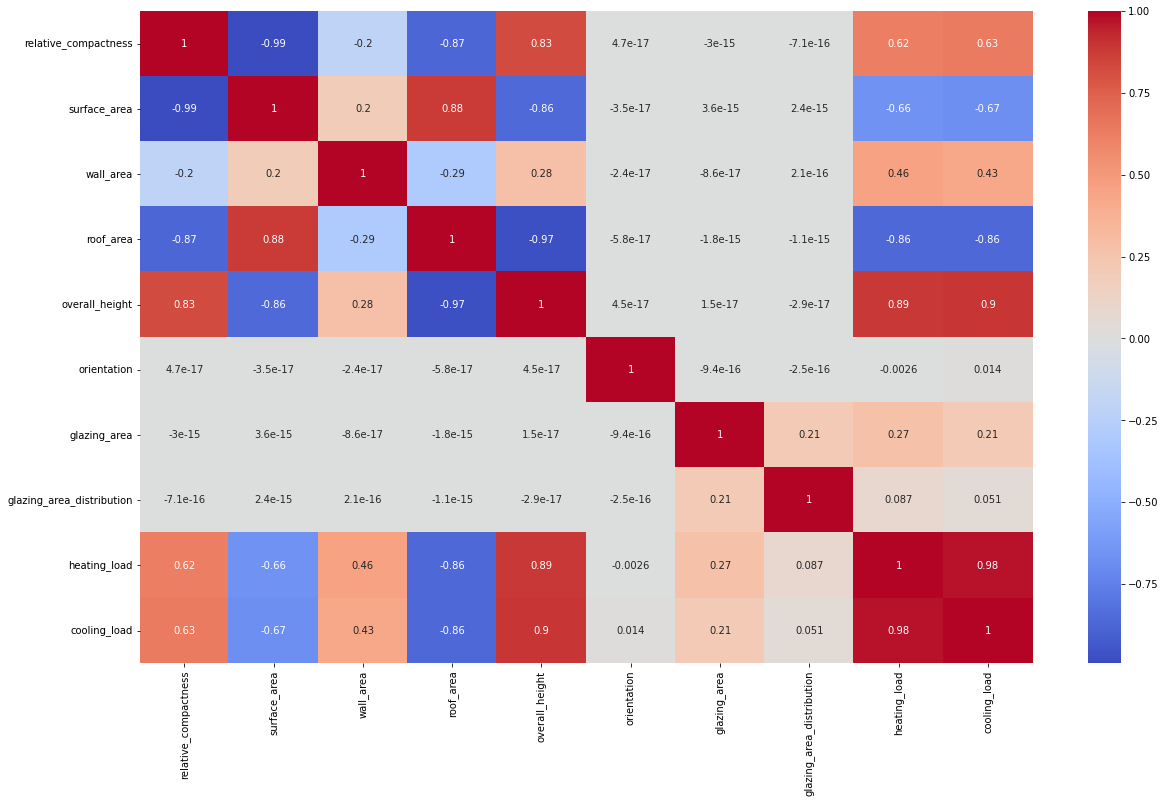

In [5]:
# Preview correlation
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

<Figure size 360x360 with 0 Axes>

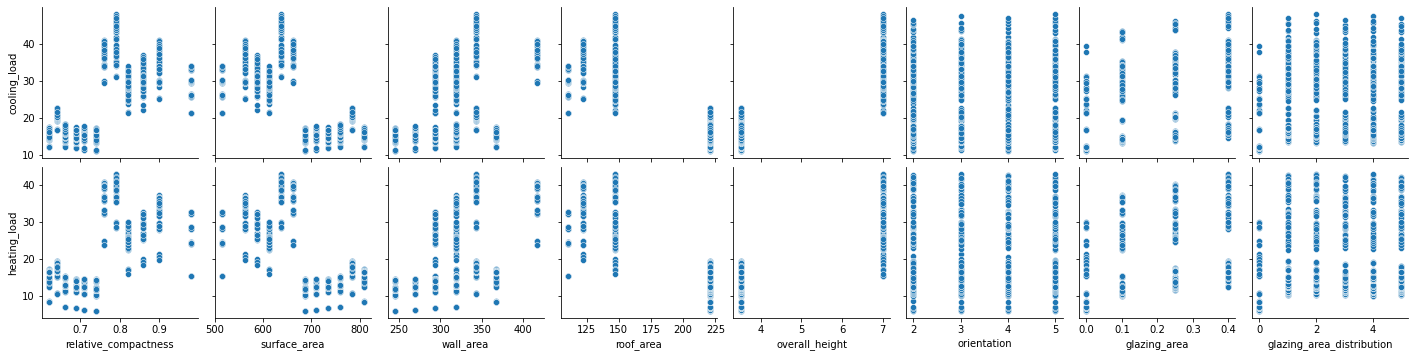

In [6]:
# Correlation between inputs and outputs
plt.figure(figsize=(5,5))
sns.pairplot(data=data, y_vars=['cooling_load','heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

In [7]:
# Check missing values
data.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [8]:
#Summary statistics
data.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [18]:
#Normalize the inputs and set the output
from sklearn.preprocessing import Normalizer
from sklearn.metrics import f1_score,roc_auc_score,confusion_matrix
nr = Normalizer(copy=False)

X = data.drop(['heating_load','cooling_load'], axis=1)
X = nr.fit_transform(X)
y = data[['heating_load','cooling_load']]

In [10]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [11]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 
dt_model = DecisionTreeRegressor()
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)
dt_model.score(X_test,y_test)

0.9658148893941219

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depth vs Accuracy')

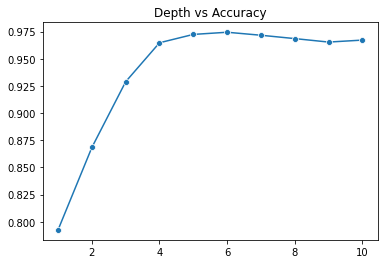

In [13]:
# Finding the best decision tree optimization parameters
dt_acc = []
dt_depth=[i for i in range(1,11)]
for i in range(1,11):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
sns.lineplot(dt_depth,dt_acc,marker="o")
plt.title('Depth vs Accuracy')

In [23]:
#Applying best hyperparameters
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 
dt_model = DecisionTreeRegressor(max_depth=7)
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)
print("Accuracy score :",dt_model.score(X_test,y_test))

Accuracy score : 0.9704081441146916


In [24]:
#Import decision tree regressor
from sklearn.ensemble import RandomForestRegressor
# Create decision tree model 
rf_model = RandomForestRegressor()
# Apply the model
rf_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)
dt_model.score(X_test,y_test)

0.9704081441146916

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depth vs Accuracy')

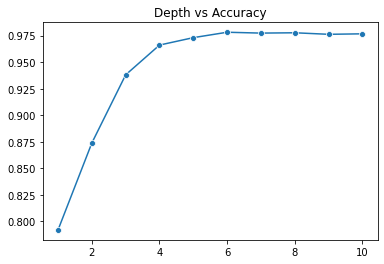

In [16]:
# Finding the best decision tree optimization parameters
dt_acc = []
for i in range(1,11):
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
sns.lineplot(dt_depth,dt_acc,marker="o")
plt.title('Depth vs Accuracy')

In [25]:
#Applying best hyperparameters
 
rf_model = RandomForestRegressor(max_depth=7)
# Apply the model
rf_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)
print("Accuracy score :",dt_model.score(X_test,y_test))

Accuracy score : 0.9704081441146916
